# REGRESIÓN SIMPLE

In [47]:
import math #operaciones matemáticas
import numpy as np #gestión numérica
import pandas as pd #estructuras de datos
import matplotlib.pyplot as plt #gráficos
import seaborn as sns #gráficos
from sklearn.model_selection import train_test_split as tts #modelar
from sklearn.linear_model import LinearRegression #algoritmo: regresión lineal
lr = LinearRegression()

## Paso 0: Datos.

Para el ejemplo del TALLER 1, se seleccionaron los últimos treinta (30) datos.

In [48]:
datos = "datos_regresion.csv"
db = pd.read_csv(datos) #we're in
db.head() #vista previa de los datos

CONSUMO  PRECIO  INGRESO
0    197.7     6.8   284752
1    115.3    10.8   167713
2     62.4    20.4    89323
3    155.7     8.1   236223
4     96.0    11.8   147043

In [49]:
db.describe()

CONSUMO     PRECIO        INGRESO
count   30.000000  30.000000      30.000000
mean    84.250000  19.890000  127836.800000
std     44.413867   8.003118   69286.997967
min     35.800000   5.300000   44408.000000
25%     59.600000  12.150000   89732.500000
50%     73.050000  21.250000  108686.500000
75%     95.100000  25.250000  146965.000000
max    232.700000  33.500000  360529.000000

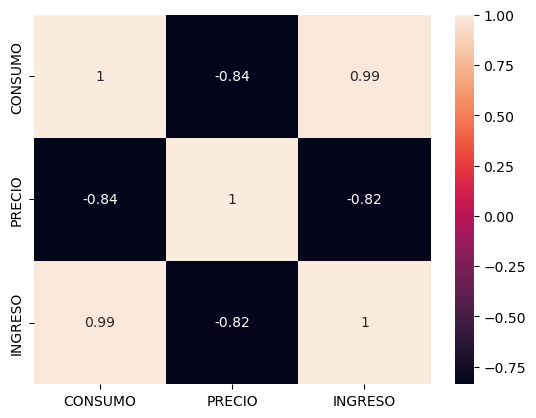

In [50]:
sns.heatmap(db.corr(), annot = True)
plt.show()

En este caso intentaremos predecir el CONSUMO (Y) de las familias, dado el PRECIO (X1) o el INGRESO (X2).

In [51]:
print(db.corr()['CONSUMO']) #correlaciones entre Y y X's

CONSUMO    1.000000
PRECIO    -0.837089
INGRESO    0.987768
Name: CONSUMO, dtype: float64


In [52]:
#unidades dadas en miles de pesos
unidad = 1000 #miles
nombre_unidad = 'pesos' #de pesos

In [53]:
def ln(x): #creación de valores ln para cada columnas
    return math.log(x)

db['INGRESO_ln'] = db['INGRESO'].apply(ln)
db['CONSUMO_ln'] = db['CONSUMO'].apply(ln)
db['PRECIO_ln'] = db['PRECIO'].apply(ln)

In [54]:
#nombrando cada columna de la base de datos
y = db.loc[:,['CONSUMO']].values
X_precio = db.loc[:,['PRECIO']].values
X_ingreso = db.loc[:,['INGRESO']].values
y_log = db.loc[:,['CONSUMO_ln']].values
X_precio_log = db.loc[:,['PRECIO_ln']].values
X_ingreso_log = db.loc[:,['INGRESO_ln']].values

X = Ingreso.
Y = Consumo.


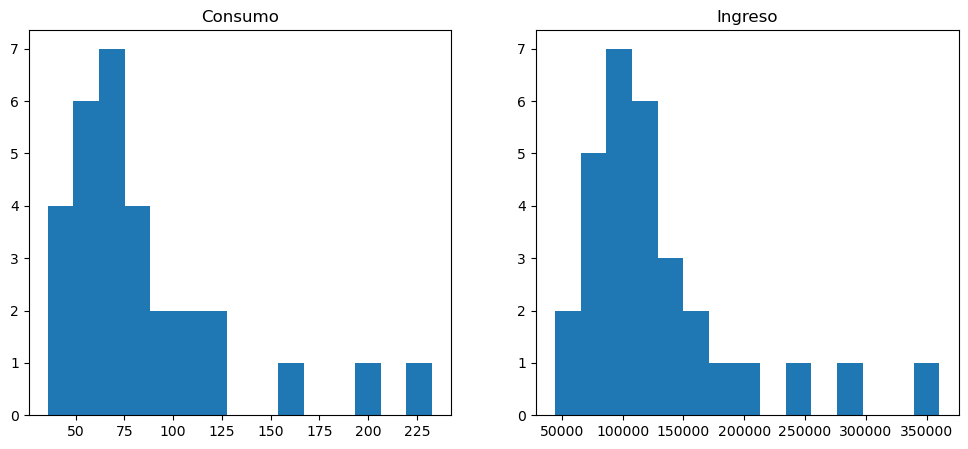

In [55]:
#eleccion de variables y nombres ¡¡¡IMPORTANTE!!!
consumo = db['CONSUMO'] #Y
precio = db['PRECIO'] #X1
ingreso = db['INGRESO'] #X2

nombre_y = 'Consumo' #en este ejemplo Y es consumo

variable_independiente = input('Escoja la variable independiente: 1 = Precio; 2 = Ingreso: ')
#plotear histogramas de variables juntos
plt.figure(figsize= (12, 5))
if variable_independiente == '1':
    nombre_x = 'Precio'

    #consumo
    plt.subplot(1,2,1)
    plt.hist(x = consumo, bins=15)
    plt.title('Consumo')

    #ingreso
    plt.subplot(1,2,2)
    plt.hist(x = ingreso, bins=15)
    plt.title('Precio')

elif variable_independiente == '2':
    nombre_x = 'Ingreso'
    
    #precio
    plt.subplot(1,2,1)
    plt.hist(x = consumo, bins=15)
    plt.title('Consumo')

    #ingreso
    plt.subplot(1,2,2)
    plt.hist(x = ingreso, bins=15)
    plt.title('Ingreso')

print('X = {}.'.format(nombre_x))
print('Y = {}.'.format(nombre_y))

## Paso 1: Estadística descriptiva univariada. Cálculo e interpretación del CV de cada variable.

In [56]:
#mean_x = media de x
#mean_y = media de y
#std_x = desviación std. de x
#std_y = desviación std. de y
#cv_x = coef. variación x
#cv_y = coef. variación y
#SCx = suma de cuadrados de x
#SCy = suma de cuadrados de y
#SCxy = suma de los productos cruzados x, y

if variable_independiente == '1':
    mean_x, mean_y = np.mean(X_precio), np.mean(y)
    std_x, std_y = np.std(X_precio, ddof=1), np.std(y, ddof=1)
    ###---CÁLCULO DE COEFICIENTES DE VARIACIÓN (cv_x) (cv_y)---###
    cv_x, cv_y = (std_x / mean_x) * 100, (std_y / mean_y) * 100
    ###---INTERPRETACIÓN (cv_x)---###
    print('Coeficiente de variación: {} (x) = {:.2f}%'.format(nombre_x, cv_x))
    if cv_x <= 30:
        print('Los valores de la variable {} son homogéneos;\nMUESTRA REPRESENTATIVA.'.format(nombre_x.lower()))
    elif cv_x > 30 and cv_x < 50:
        print('Los valores de la variable {} son un poco heterogéneos;\nMUESTRA POCO REPRESENTATIVA.'.format(nombre_x.lower()))
    elif cv_x > 50:
        print('Los valores de la variable {} son muy heterógeneos;\nMUESTRA NO REPRESENTATIVA.'.format(nombre_x.lower()))
    ###---INTERPRETACIÓN (cv_y)---###
    print('\nCoeficiente de variación: {} (y) = {:.2f}%'.format(nombre_y, cv_y))
    if cv_y <= 30:
        print('Los valores de la variable {} son homogéneos;\nMUESTRA REPRESENTATIVA.'.format(nombre_y.lower()))
    elif cv_y > 30 and cv_y < 50:
        print('Los valores de la variable {} son un poco heterogéneos;\nMUESTRA POCO REPRESENTATIVA.'.format(nombre_y.lower()))
    elif cv_y > 50:
        print('Los valores de la variable {} son muy heterógeneos;\nMUESTRA NO REPRESENTATIVA.'.format(nombre_y.lower()))
if variable_independiente == '2':
    mean_x, mean_y = np.mean(X_ingreso), np.mean(y)
    std_x, std_y = np.std(X_ingreso, ddof=1), np.std(y, ddof=1)
    ###---CÁLCULO DE COEFICIENTES DE VARIACIÓN (cv_x) (cv_y)---###
    cv_x, cv_y = (std_x / mean_x) * 100, (std_y / mean_y) * 100
    ###---INTERPRETACIÓN (cv_x)---###
    print('Coeficiente de variación: {} (x) = {:.2f}%'.format(nombre_x, cv_x))
    if cv_x <= 30:
        print('Los valores de la variable {} son homogéneos;\nMUESTRA REPRESENTATIVA.'.format(nombre_x.lower()))
    elif cv_x > 30 and cv_x < 50:
        print('Los valores de la variable {} son un poco heterogéneos;\nMUESTRA POCO REPRESENTATIVA.'.format(nombre_x.lower()))
    elif cv_x > 50:
        print('Los valores de la variable {} son muy heterógeneos;\nMUESTRA NO REPRESENTATIVA.'.format(nombre_x.lower()))
    ###---INTERPRETACIÓN (cv_y)---###
    print('\nCoeficiente de variación: {} (y) = {:.2f}%'.format(nombre_y, cv_y))
    if cv_y <= 30:
        print('Los valores de la variable {} son homogéneos;\nMUESTRA REPRESENTATIVA.'.format(nombre_y.lower()))
    elif cv_y > 30 and cv_y < 50:
        print('Los valores de la variable {} son un poco heterogéneos;\nMUESTRA POCO REPRESENTATIVA.'.format(nombre_y.lower()))
    elif cv_y > 50:
        print('Los valores de la variable {} son muy heterógeneos;\nMUESTRA NO REPRESENTATIVA.'.format(nombre_y.lower()))

Coeficiente de variación: Ingreso (x) = 54.20%
Los valores de la variable ingreso son muy heterógeneos;
MUESTRA NO REPRESENTATIVA.

Coeficiente de variación: Consumo (y) = 52.72%
Los valores de la variable consumo son muy heterógeneos;
MUESTRA NO REPRESENTATIVA.


## Paso 2: Diagrama de dispersión y análisis de R^2.

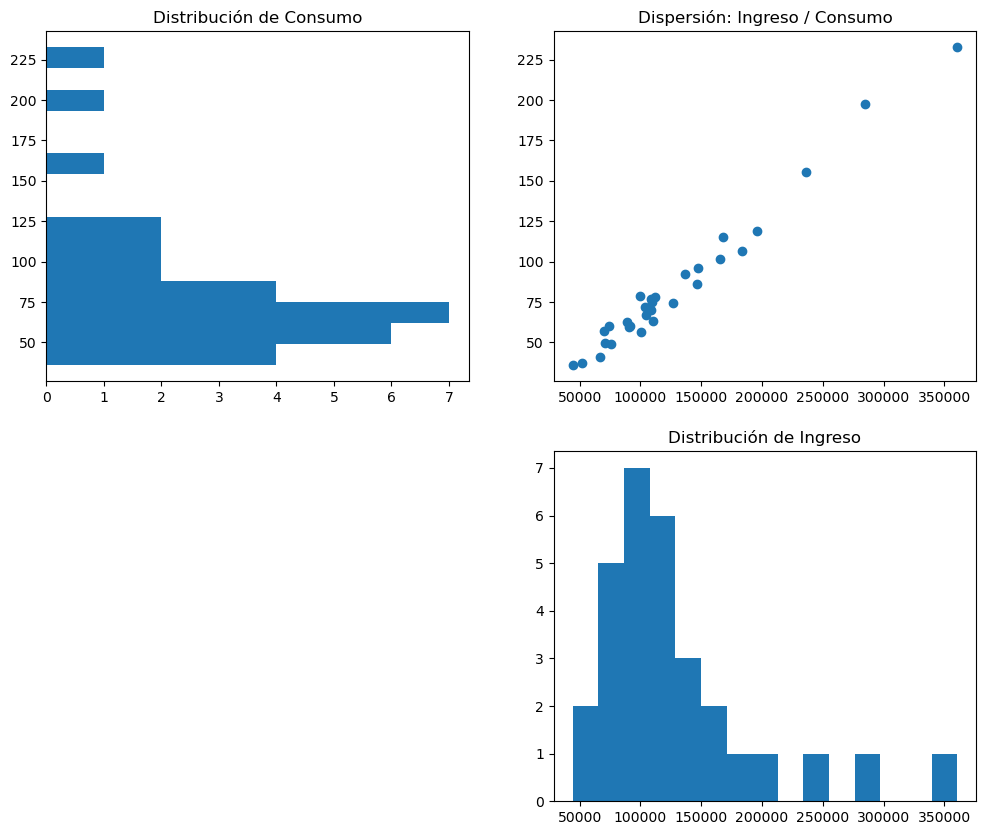

RECOMENDACIÓN: El mejor R2 (0.98) para el modelo ingreso / consumo lo arroja una regresión: LINEAL.


In [57]:
#mejor R2
R2s = []

if variable_independiente == '1':
    #R2_precio_consumo_lineal
    lr.fit(X_precio, y)
    R2_consumo_lineal = lr.score(X_precio, y)
    print(R2_consumo_lineal)
    print(lr.intercept_)
    print(lr.coef_)
    R2s.append((R2_consumo_lineal, 'LINEAL'))

    #R2_precio_consumo_logaritmico
    lr.fit(X_precio_log, y)
    R2_consumo_log = lr.score(X_precio_log, y)
    print(R2_consumo_lineal)
    print(lr.intercept_)
    print(lr.coef_)
    R2s.append((R2_consumo_log, 'LOGARÍTMICA'))

    #R2_precio_consumo_exponencial
    lr.fit(X_precio, y_log)
    R2_consumo_exp = lr.score(X_precio, y_log)
    R2s.append((R2_consumo_exp, 'EXPONENCIAL'))

    #R2_precio_consumo_potencial
    lr.fit(X_precio_log, y_log)
    R2_consumo_pot = lr.score(X_precio_log, y_log)
    R2s.append((R2_consumo_pot, 'POTENCIAL'))

    ###---DIAGRAMA DE DISPERSIÓN---###
    plt.figure(figsize = (12,10))
    plt.subplot(2,2,2)
    plt.scatter(x = precio, y = consumo)
    plt.title('Dispersión: Precio / Consumo')

    #join precio/consumo
    #distibución de precio
    plt.subplot(2,2,4)
    plt.hist(x = precio, bins = 15)
    plt.title('Distribución de Consumo')

    #distibución de consumo
    plt.subplot(2,2,1)
    plt.hist(x = consumo, orientation ='horizontal', bins = 15)
    plt.title('Distribución de Precio')
    plt.show()

elif variable_independiente == '2':
    #R2_ingreso_consumo_lineal
    lr.fit(X_ingreso, y)
    R2_precio_lineal = lr.score(X_ingreso, y)
    R2s.append((R2_precio_lineal, 'LINEAL'))

    #R2_ingreso_consumo_logaritmico
    lr.fit(X_ingreso_log, y)
    R2_precio_log = lr.score(X_ingreso_log, y)
    R2s.append((R2_precio_log, 'LOGARÍTMICA'))

    #R2_ingreso_consumo_exponencial
    lr.fit(X_ingreso, y_log)
    R2_precio_exp = lr.score(X_ingreso, y_log)
    R2s.append((R2_precio_exp, 'EXPONENCIAL'))

    #R2_ingreso_consumo_potencial
    lr.fit(X_ingreso_log, y_log)
    R2_precio_pot = lr.score(X_ingreso_log, y_log)
    R2s.append((R2_precio_pot, 'POTENCIAL'))

    ###---DIAGRAMA DE DISPERSIÓN---###
    plt.figure(figsize = (12,10))
    plt.subplot(2,2,2)
    plt.scatter(x = ingreso, y = consumo)
    plt.title('Dispersión: Ingreso / Consumo')
    
    #join ingreso/precio
    #distibución de ingreso
    plt.subplot(2,2,4)
    plt.hist(x = ingreso, bins = 15)
    plt.title('Distribución de Ingreso')
    
    #distibución de precio
    plt.subplot(2,2,1)
    plt.hist(x = consumo, orientation ='horizontal', bins = 15)
    plt.title('Distribución de Consumo')
    plt.show()

max_R2 = max(R2s, key=lambda x: x[0]) #recomendación para modelo
print('RECOMENDACIÓN: El mejor R2 ({:.2f}) para el modelo {} / {} lo arroja una regresión: {}.'.format(max_R2[0],
                                                                                                   nombre_x.lower(),
                                                                                                   nombre_y.lower(),
                                                                                                   max_R2[1]))

## Paso 3: Elección, estimación e interpretación del modelo.

In [58]:
modelo = input ('Escoja un modelo: 1 = Lineal; 2 = Logarítmico; 3 = Exponencial; 4 = Potencial: ')

if variable_independiente == '1':

    if modelo == '1':
        #elección_consumo/ingreso_lineal
        lr.fit(X_precio, y)
        R2_consumo_lineal = lr.score(X_precio, y)
        print('REGRESIÓN LINEAL: {} / {}.'.format(nombre_x.lower(),
                                                  nombre_y.lower()))
        print('R^2 = {:.2f}'.format(R2_consumo_lineal))
        a_lin = lr.intercept_
        b_lin = lr.coef_
        print('\nA = {:.2f}'.format(a_lin[0]))
        #interpretación_ingreso/consumo_lineal
        print('Si {} es constante, {} es igual a {:.2f} {}.'.format(nombre_x.lower(),
                                                                    nombre_y.lower(),
                                                                    a_lin[0],
                                                                    nombre_unidad))
        print('\nB = {:.5f}'.format(b_lin[0][0]))
        print('Por un incremento de {:.2f} {} en {}, el {} disminuye en {:.5f} {}.'.format(unidad,
                                                                                         nombre_unidad,
                                                                                         nombre_x.lower(),
                                                                                         nombre_y.lower(),
                                                                                         b_lin[0][0] * unidad,
                                                                                         nombre_unidad))
        print('\nECUACIÓN: Y = {:.2f} + {:.5f}X'.format(a_lin[0],b_lin[0][0]))
        #estimación_ingreso/consumo_lineal
        print('\nY-ESTIMADA:')
        y_pred = lr.predict(y)
        print(y_pred[0:5]) #primeros 5 valores estimados

    if modelo == '2':
        #elección_ingreso/consumo_log
        lr.fit(X_precio_log, y)
        R2_consumo_log = lr.score(X_precio_log, y)
        print('REGRESIÓN LOGARÍTMICA: {} / {}.'.format(nombre_x.lower(),
                                                       nombre_y.lower()))
        print('\nR^2 = {:.2f}'.format(R2_consumo_log))
        a_log = lr.intercept_
        b_log = lr.coef_
        print('\nA = {:.2f}'.format(a_log[0]))
        print('\nB = {:.5f}'.format(b_log[0][0]))
        #interpretación_ingreso/consumo_log
        print('Por un incremento del 1% en {}, el {} disminuye en {:.5f} {}.'.format(nombre_x.lower(),
                                                                                   nombre_y.lower(),
                                                                                   b_log[0][0] * unidad,
                                                                                   nombre_unidad))
        print('\nECUACIÓN: Y = {:.2f} + {:.5f}LnX'.format(a_log[0],b_log[0][0]))
        #estimación_ingreso/consumo_log
        print('\nY-ESTIMADA:')
        y_pred = lr.predict(y)
        print(y_pred[0:5]) #primeros 5 valores estimados

    if modelo == '3':
        #elección_ingreso/consumo_exp
        lr.fit(X_precio, y_log)
        R2_consumo_exp = lr.score(X_precio, y_log)
        print('REGRESIÓN EXPONENCIAL: {} / {}.'.format(nombre_x.lower(),
                                                       nombre_y.lower()))
        print('\nR^2 = {:.2f}'.format(R2_consumo_exp))
        a_exp = lr.intercept_
        b_exp = lr.coef_
        print('\nA = {:.2f}'.format(a_exp[0]))
        print('\nB = {:.5f}'.format(b_exp[0][0]))
        #interpretación_ingreso/consumo_exp
        print('Por un incremento de {:.2f} {} en {}, el {} disminuye en {:.5f} {}.'.format(unidad,
                                                                                         nombre_unidad,
                                                                                         nombre_x.lower(),
                                                                                         nombre_y.lower(),
                                                                                         b_exp[0][0] * unidad,
                                                                                         nombre_unidad))
        print('\nECUACIÓN: Y = Ln[e^{:.2f} * e^{:.7f}X]'.format(a_exp[0],b_exp[0][0]))
        #estimación_ingreso/consumo_exp
        print('\nY-ESTIMADA:')
        y_pred = lr.predict(y)
        print(y_pred[0:5]) #primeros 5 valores estimados

    if modelo == '4':
        #elección_ingreso/consumo_pot
        lr.fit(X_precio_log, y_log)
        R2_consumo_pot = lr.score(X_precio_log, y_log)
        print('REGRESIÓN POTENCIAL: {} / {}.'.format(nombre_x.lower(),
                                                  nombre_y.lower()))
        print('\nR^2 = {:.2f}'.format(R2_consumo_pot))
        a_pot = lr.intercept_
        b_pot = lr.coef_
        print('\nA = {:.2f}'.format(a_pot[0]))
        print('\nB = {:.5f}'.format(b_pot[0][0]))
        #interpretación_ingreso/consumo_pot
        print('Por un incremento del 1% en {}, el {} disminuye en {:.2f}%.'.format(nombre_x.lower(),
                                                                                     nombre_y.lower(),
                                                                                     b_pot[0][0] * 100))
        print('\nECUACIÓN: Y = Ln[e^{:.2f} * X^({:.7f}LnX)]'.format(a_pot[0],b_pot[0][0]))
        #estimación_ingreso/consumo_pot
        print('\nY-ESTIMADA:')
        y_pred = lr.predict(y)
        print(y_pred[0:5]) #primeros 5 valores estimados
        
elif variable_independiente == '2':

    if modelo == '1':
        #elección_ingreso/precio_lineal
        lr.fit(X_ingreso, y)
        R2_precio_lineal = lr.score(X_ingreso, y)
        print('REGRESIÓN LINEAL: {} / {}.'.format(nombre_x.lower(),
                                                  nombre_y.lower()))
        print('R^2 = {:.2f}'.format(R2_precio_lineal))
        a_lin = lr.intercept_
        b_lin = lr.coef_
        print('\nA = {:.2f}'.format(a_lin[0]))
        #interpretación_ingreso/precio_lineal
        print('Si {} es constante, {} es igual a {:.2f} {}.'.format(nombre_x.lower(),
                                                                    nombre_y.lower(),
                                                                    a_lin[0] * unidad,
                                                                    nombre_unidad))
        print('\nB = {:.5f}'.format(b_lin[0][0]))
        print('Por un incremento de {:.2f} {} en {}, el {} aumenta en {:.5f} {}.'.format(unidad,
                                                                                         nombre_unidad,
                                                                                         nombre_x.lower(),
                                                                                         nombre_y.lower(),
                                                                                         b_lin[0][0] * unidad,
                                                                                         nombre_unidad))
        print('\nECUACIÓN: Y = {:.2f} + {:.5f}X'.format(a_lin[0],b_lin[0][0]))
        #estimación_ingreso/precio_lineal
        print('\nY-ESTIMADA:')
        y_pred = lr.predict(y)
        print(y_pred[0:5]) #primeros 5 valores estimados
    
    if modelo == '2':
        #elección_ingreso/precio_log
        lr.fit(X_ingreso_log, y)
        R2_precio_log = lr.score(X_ingreso_log, y)
        print('REGRESIÓN LOGARÍTMICA: {} / {}.'.format(nombre_x.lower(),
                                                       nombre_y.lower()))
        print('\nR^2 = {:.2f}'.format(R2_precio_log))
        a_log = lr.intercept_
        b_log = lr.coef_
        print('\nA = {:.2f}'.format(a_log[0]))
        print('\nB = {:.5f}'.format(b_log[0][0]))
        #interpretación_ingreso/precio_log
        print('Por un incremento del 1% en {}, el {} aumenta en {:.5f} {}.'.format(nombre_x.lower(),
                                                                                   nombre_y.lower(),
                                                                                   b_log[0][0] * unidad,
                                                                                   nombre_unidad))
        print('\nECUACIÓN: Y = {:.2f} + {:.5f}LnX'.format(a_log[0],b_log[0][0]))
        #estimación_ingreso/precio_log
        print('\nY-ESTIMADA:')
        y_pred = lr.predict(y)
        print(y_pred[0:5]) #primeros 5 valores estimados

    if modelo == '3':
        #elección_ingreso/precio_exp
        lr.fit(X_ingreso, y_log)
        R2_precio_exp = lr.score(X_ingreso, y_log)
        print('REGRESIÓN EXPONENCIAL: {} / {}.'.format(nombre_x.lower(),
                                                       nombre_y.lower()))
        print('\nR^2 = {:.2f}'.format(R2_precio_exp))
        a_exp = lr.intercept_
        b_exp = lr.coef_
        print('\nA = {:.2f}'.format(a_exp[0]))
        print('\nB = {:.5f}'.format(b_exp[0][0]))
        #interpretación_ingreso/precio_exp
        print('Por un incremento de {:.2f} {} en {}, el {} aumenta en {:.5f} {}.'.format(unidad,
                                                                                         nombre_unidad,
                                                                                         nombre_x.lower(),
                                                                                         nombre_y.lower(),
                                                                                         b_exp[0][0] * unidad,
                                                                                         nombre_unidad))
        print('\nECUACIÓN: Y = Ln[e^{:.2f} * e^{:.7f}X]'.format(a_exp[0],b_exp[0][0]))
        #estimación_ingreso/precio_exp
        print('\nY-ESTIMADA:')
        y_pred = lr.predict(y)
        print(y_pred[0:5]) #primeros 5 valores estimados

    if modelo == '4':
        #elección_ingreso/precio_pot
        lr.fit(X_ingreso_log, y_log)
        R2_precio_pot = lr.score(X_ingreso_log, y_log)
        print('REGRESIÓN POTENCIAL: {} / {}.'.format(nombre_x.lower(),
                                                  nombre_y.lower()))
        print('\nR^2 = {:.2f}'.format(R2_precio_pot))
        a_pot = lr.intercept_
        b_pot = lr.coef_
        print('\nA = {:.2f}'.format(a_pot[0]))
        print('\nB = {:.5f}'.format(b_pot[0][0]))
        #interpretación_ingreso/precio_pot
        print('Por un incremento del 1% en {}, el {} aumenta en {:.2f}%.'.format(nombre_x.lower(),
                                                                                     nombre_y.lower(),
                                                                                     b_pot[0][0] * 100))
        print('\nECUACIÓN: Y = Ln[e^{:.2f} * X^({:.7f}LnX)]'.format(a_pot[0],b_pot[0][0]))
        #estimación_ingreso/precio_pot
        print('\nY-ESTIMADA:')
        y_pred = lr.predict(y)
        print(y_pred[0:5]) #primeros 5 valores estimados

REGRESIÓN LINEAL: ingreso / consumo.
R^2 = 0.98

A = 3.31
Si ingreso es constante, consumo es igual a 3307.34 pesos.

B = 0.00063
Por un incremento de 1000.00 pesos en ingreso, el consumo aumenta en 0.63317 pesos.

ECUACIÓN: Y = 3.31 + 0.00063X

Y-ESTIMADA:
[[3.43251544]
 [3.38034208]
 [3.34684729]
 [3.40592222]
 [3.36812186]]


## Paso 4: Pronóstico.

In [59]:
def estimar_valor_lineal():
    print('PRONÓSTICO PARA REGRESIÓN LINEAL:\n')

    x = []
    y = []
    
    x_estimado = None
    while x_estimado != 0:
        x_estimado = float(input('Ingrese un valor que desee estimar; (0) para salir: '))
        if x_estimado != 0:
            y_estimado = a_lin[0] + ((b_lin[0][0] * x_estimado))
            x.append(x_estimado)
            y.append(y_estimado)
            print('Se estima que por cada ${:.2f} {} en el {}, haya un {} de ${:.2f} {}.'.format(x_estimado,
                                                                                                 nombre_unidad,
                                                                                                 nombre_x.lower(),
                                                                                                 nombre_y.lower(),
                                                                                                 y_estimado * 1000,
                                                                                                 nombre_unidad))

def estimar_valor_log():
    print('PRONÓSTICO PARA REGRESIÓN LOGARÍTMICA:\n')

    x = []
    y = []
    
    x_estimado = None
    while x_estimado != 0:
        x_estimado = float(input('Ingrese un valor que desee estimar; (0) para salir: '))
        if x_estimado != 0:
            y_estimado = (b_log[0][0] * math.log(x_estimado)) + a_log[0]
            x.append(x_estimado)
            y.append(y_estimado)
            print('Se estima que por cada ${:.2f} {} en el {}, haya un {} de ${:.2f} {}.'.format(x_estimado,
                                                                                                 nombre_unidad,
                                                                                                 nombre_x.lower(),
                                                                                                 nombre_y.lower(),
                                                                                                 y_estimado * 1000,
                                                                                                 nombre_unidad))

def estimar_valor_exp():
    print('PRONÓSTICO PARA REGRESIÓN EXPONENCIAL:\n')

    x = []
    y = []
    
    x_estimado = None
    while x_estimado != 0:
        x_estimado = float(input('Ingrese un valor que desee estimar; (0) para salir: '))
        if x_estimado != 0:
            y_estimado = a_exp[0] + (x_estimado * b_exp[0][0])
            x.append(x_estimado)
            y.append(y_estimado)
            print('Se estima que por cada ${:.2f} {} en el {}, haya un {} de ${:.2f} {}.'.format(x_estimado,
                                                                                                 nombre_unidad,
                                                                                                 nombre_x.lower(),
                                                                                                 nombre_y.lower(),
                                                                                                 y_estimado * 1000,
                                                                                                 nombre_unidad))

def estimar_valor_pot():
    print('PRONÓSTICO PARA REGRESIÓN POTENCIAL:\n')

    x = []
    y = []
    
    x_estimado = None
    while x_estimado != 0:
        x_estimado = float(input('Ingrese un valor que desee estimar; (0) para salir: '))
        if x_estimado != 0:
            y_estimado = (math.e ** a_pot[0]) * (x_estimado ** b_pot[0][0])
            x.append(x_estimado)
            y.append(y_estimado)
            print('Se estima que por cada ${:.2f} {} en el {}, haya un {} de ${:.2f} {}.'.format(x_estimado,
                                                                                                 nombre_unidad,
                                                                                                 nombre_x.lower(),
                                                                                                 nombre_y.lower(),
                                                                                                 y_estimado * 1000,
                                                                                                 nombre_unidad))

if modelo == '1':
    estimar_valor_lineal()
elif modelo == '2':
    estimar_valor_log()
elif modelo == '3':
    estimar_valor_exp()
elif modelo == '4':
    estimar_valor_pot()

PRONÓSTICO PARA REGRESIÓN LINEAL:

Se estima que por cada $284000.00 pesos en el ingreso, haya un consumo de $183128.14 pesos.
Se estima que por cada $400000.00 pesos en el ingreso, haya un consumo de $256576.08 pesos.
